# Random Forest

Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('Fraud_check.csv')
features.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
#getting information of dataset
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
features.shape

(600, 6)

In [5]:
features.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [6]:
features.columns=['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban']

In [7]:
features['taxable']= np.where(features['Taxable_Income']<= 30000, "Risky" , "Good")
features.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,taxable
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [8]:
features['taxable'].unique()

array(['Good', 'Risky'], dtype=object)

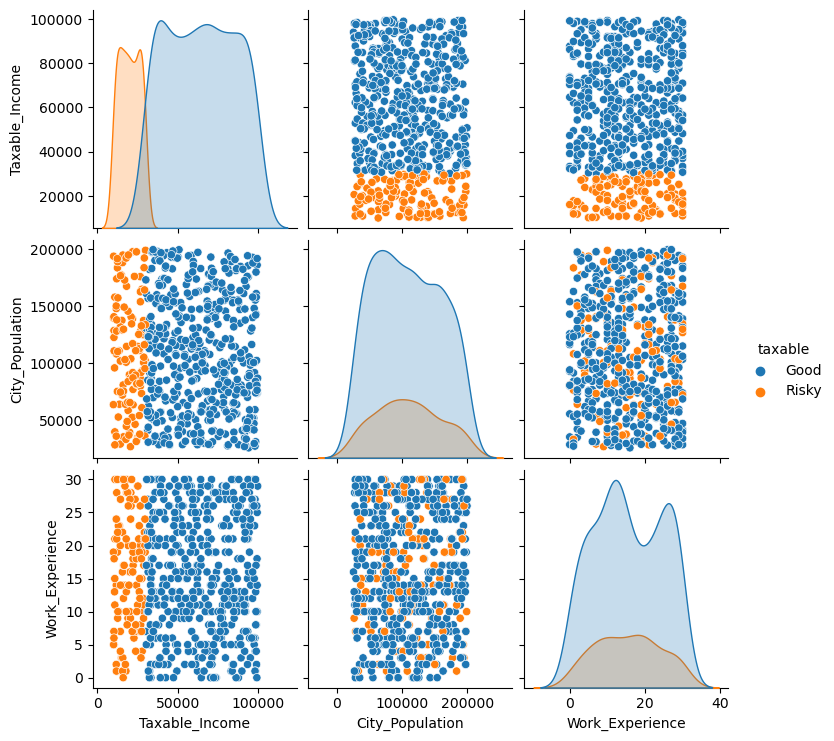

In [9]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=features,hue='taxable')

In [10]:
from sklearn import preprocessing

In [11]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(features,columns=['Undergrad','Marital_Status','Urban','taxable'])

In [12]:
df.drop(["Taxable_Income","taxable_Risky"],axis=1,inplace=True)

In [13]:
df

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,taxable_Good
0,50047,10,1,0,0,0,1,0,1,1
1,134075,18,0,1,1,0,0,0,1,1
2,160205,30,1,0,0,1,0,0,1,1
3,193264,15,0,1,0,0,1,0,1,1
4,27533,28,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,1
596,55369,2,0,1,1,0,0,0,1,1
597,154058,0,1,0,1,0,0,0,1,1
598,180083,17,0,1,0,1,0,1,0,1


In [14]:
from sklearn.preprocessing import minmax_scale
normal_data=pd.DataFrame(minmax_scale(df),columns=df.columns)
normal_data

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,taxable_Good
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [15]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [16]:
pd.DataFrame(normal_data.values[:,0:9])

,0,1,2,3,4,5,6,7,8
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
595,0.078811,0.233333,0.0,1.0,1.0,0.0,0.0,0.0,1.0
596,0.170058,0.066667,0.0,1.0,1.0,0.0,0.0,0.0,1.0
597,0.737240,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
598,0.886810,0.566667,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [17]:
x=normal_data.values[:,0:9]
y=normal_data.values[:,9]
x

array([[0.13947207, 0.33333333, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.62239438, 0.6       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77256766, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.73723987, 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.88680969, 0.56666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.76068253, 0.53333333, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [18]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

In [19]:
colnames = list(df.columns)
colnames

['City_Population',
 'Work_Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Urban_NO',
 'Urban_YES',
 'taxable_Good']

In [20]:
# Descriptive statistics for each column
df.describe()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,taxable_Good
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333,0.793333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406,0.405252
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df.head()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,taxable_Good
0,50047,10,1,0,0,0,1,0,1,1
1,134075,18,0,1,1,0,0,0,1,1
2,160205,30,1,0,0,1,0,0,1,1
3,193264,15,0,1,0,0,1,0,1,1
4,27533,28,1,0,0,1,0,1,0,1


In [22]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [23]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (450, 9)
Training Labels Shape: (450,)
Testing Features Shape: (150, 9)
Testing Labels Shape: (150,)


# Establish Baseline

In [24]:
pd.DataFrame(test_features)

,0,1,2,3,4,5,6,7,8
0,0.038339,0.633333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.645377,0.666667,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.030374,0.933333,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.531986,0.866667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.059408,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
145,0.405698,0.966667,1.0,0.0,0.0,0.0,1.0,0.0,1.0
146,0.652245,0.966667,0.0,1.0,1.0,0.0,0.0,1.0,0.0
147,0.657975,0.933333,1.0,0.0,1.0,0.0,0.0,1.0,0.0
148,0.755591,0.700000,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [25]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, 8]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.53


In [26]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.35 degrees.


Determine Performance Metrics

In [28]:
test_labels

array([0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [29]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.sum(errors) / np.sum(test_labels))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 54.52 %.


In [30]:
from sklearn.tree import export_graphviz

In [31]:
import os
os.environ["PATH"] += os.pathsep + "Users/Vinay N/bin/dot"

In [32]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1.dot', feature_names = colnames[0:9], rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree1.dot')
# Write graph to a png file
graph.write_png('tree1.png')

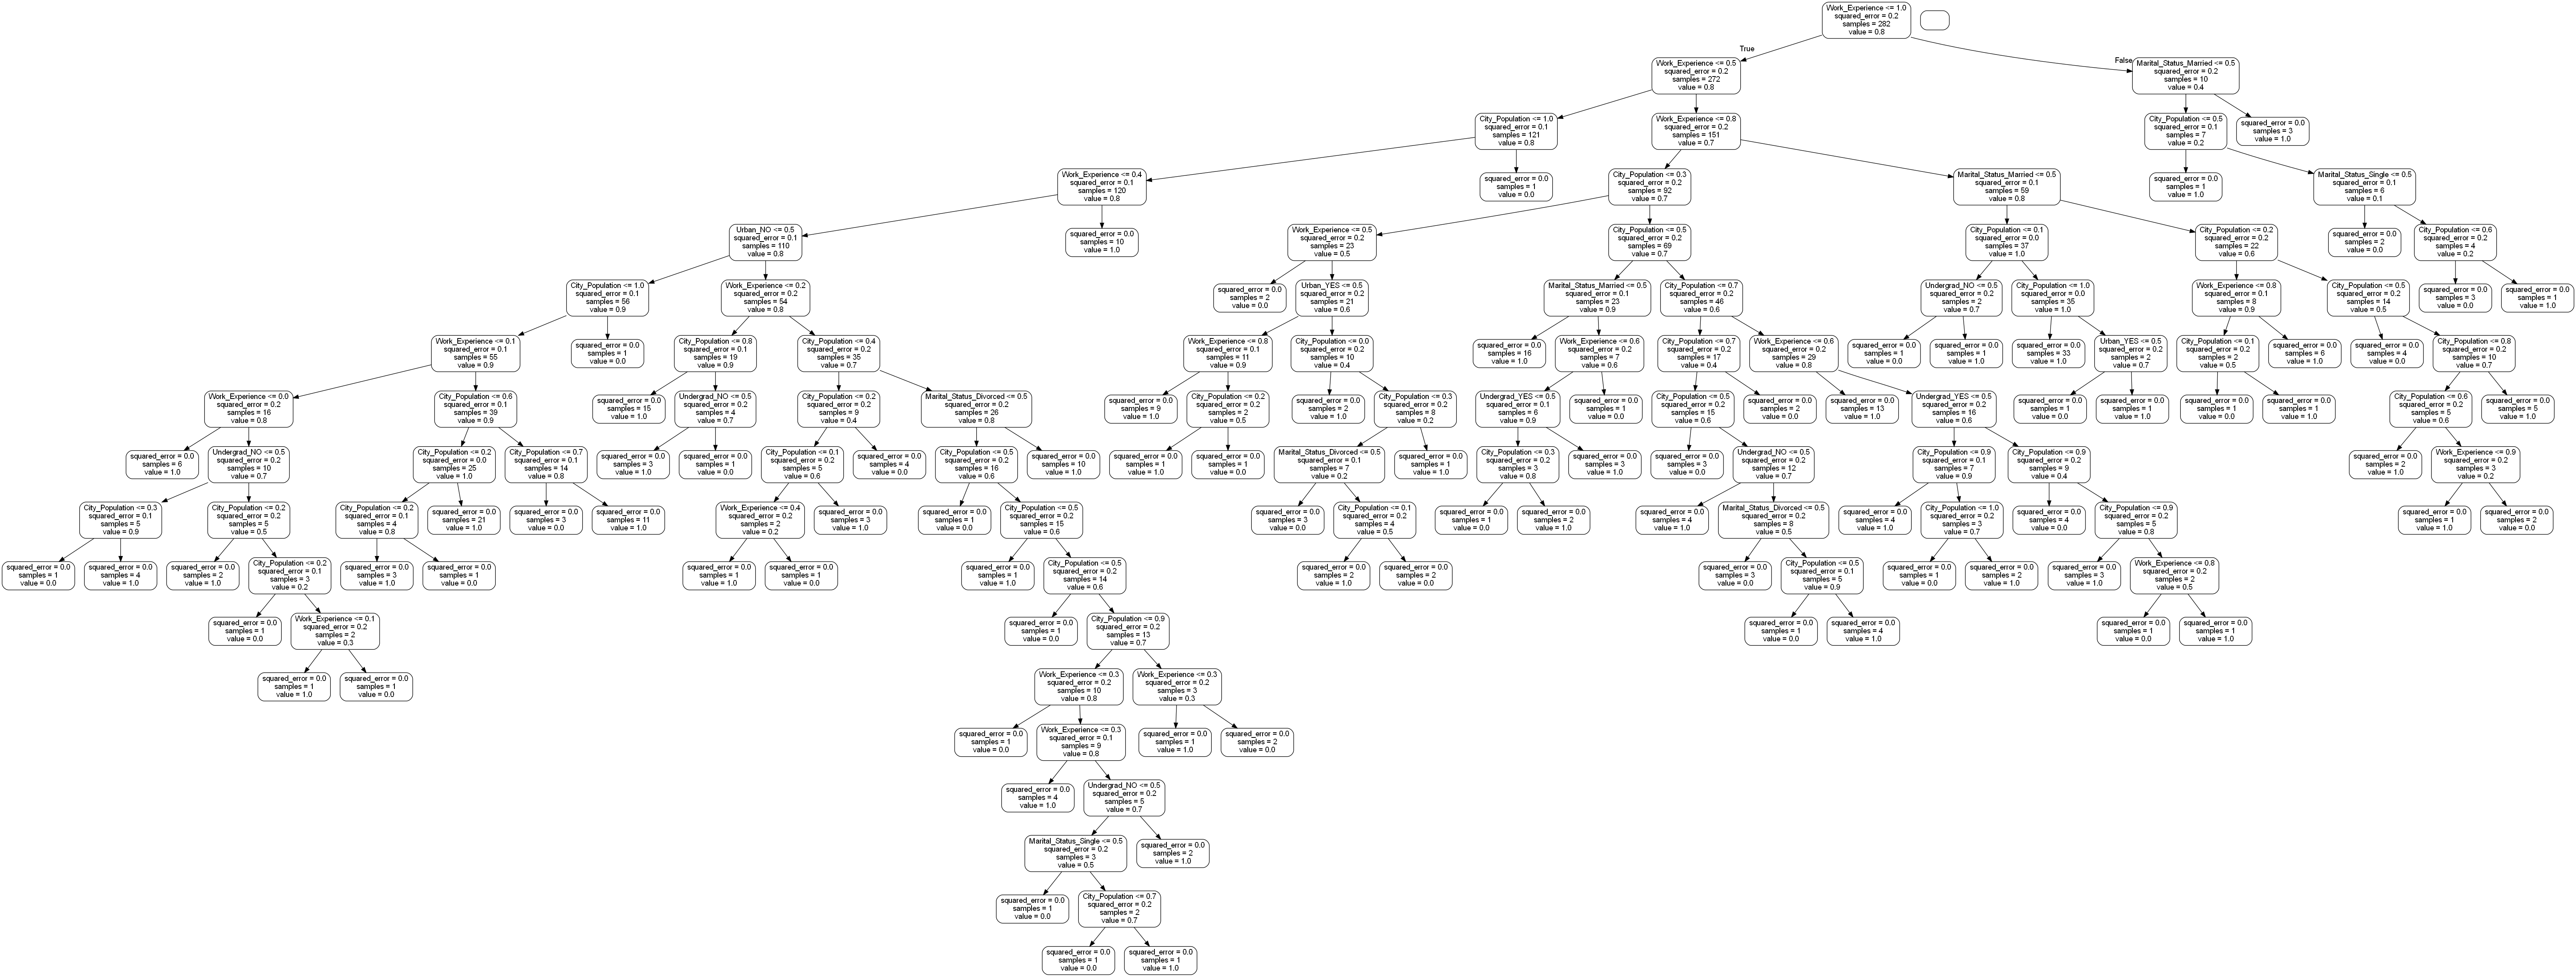

In [33]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree1.dot', feature_names = colnames[0:9], rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree1.dot')
graph.write_png('small_tree1.png');

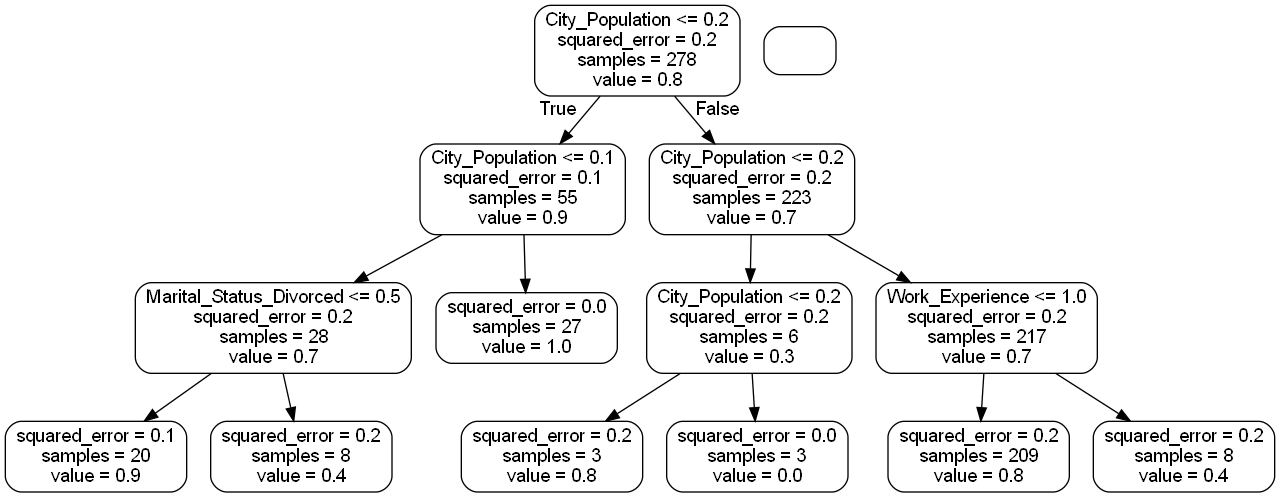

In [34]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(colnames[0:9], importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: City_Population      Importance: 0.55
Variable: Work_Experience      Importance: 0.25
Variable: Undergrad_NO         Importance: 0.03
Variable: Undergrad_YES        Importance: 0.03
Variable: Marital_Status_Married Importance: 0.03
Variable: Urban_NO             Importance: 0.03
Variable: Urban_YES            Importance: 0.03
Variable: Marital_Status_Divorced Importance: 0.02
Variable: Marital_Status_Single Importance: 0.02


In [35]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [colnames.index('taxable_Good')-1, colnames.index('City_Population')-1]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (np.sum(errors) / np.sum(test_labels)))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.33 degrees.
Accuracy: 57.3 %.


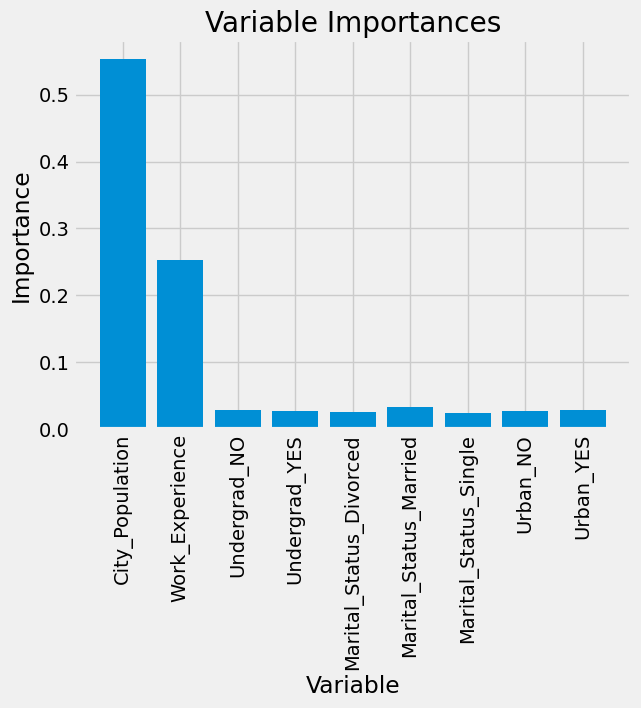

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, colnames[0:9], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [37]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
array = df.values
X = array[:,0:9]
Y = array[:,9]
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10,shuffle=True ,random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7366666666666667
